<a href="https://colab.research.google.com/github/Ankit9997verma/123/blob/main/Movie_Recommendation_(Google_Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

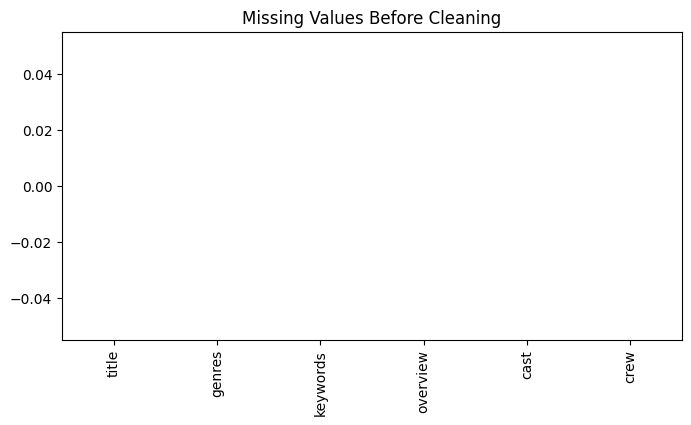

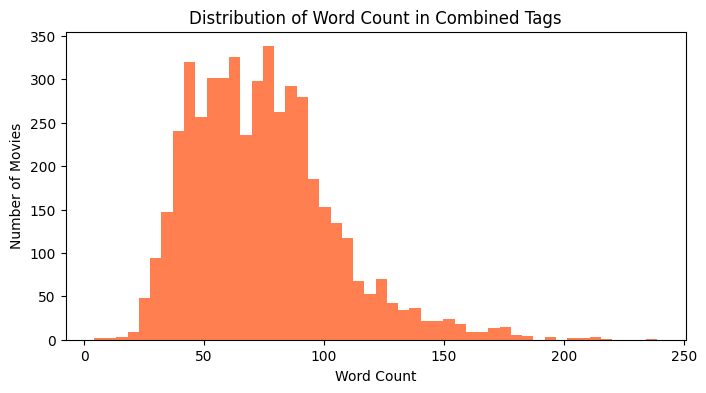

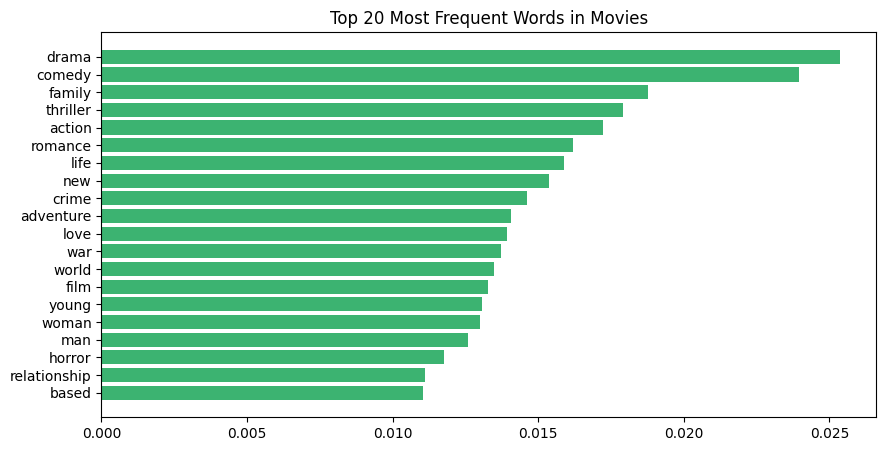

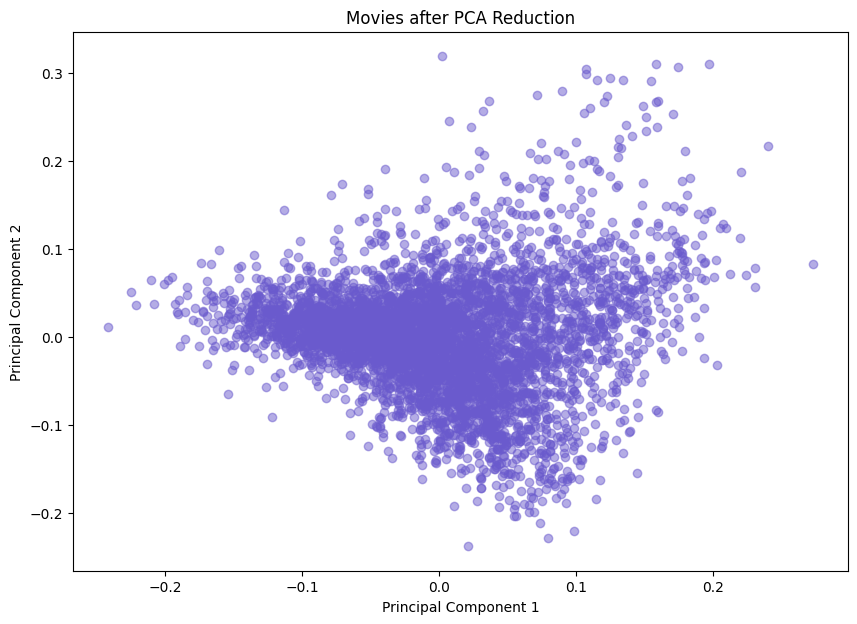


Top 5 movies similar to 'Avatar':

• Aliens
• Alien
• Moonraker
• Alien³
• Silent Running


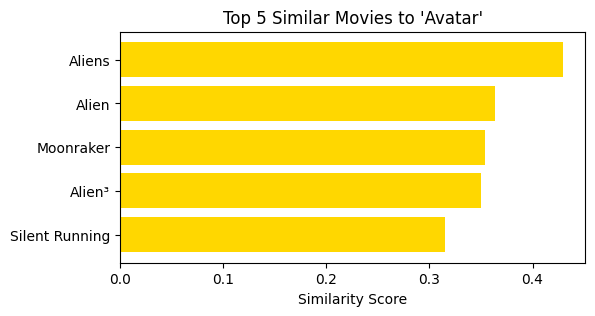


Top 5 movies similar to 'The Dark Knight Rises':

• The Dark Knight
• Batman Begins
• Batman Returns
• Batman
• Batman


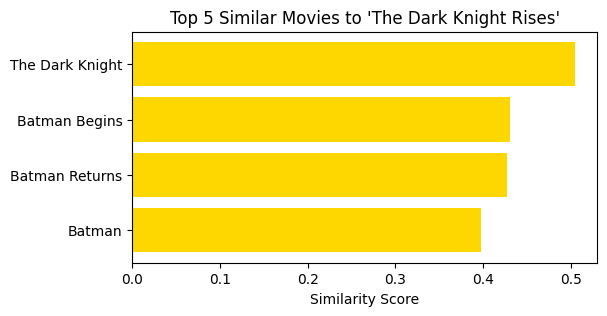


Top 5 movies similar to 'Inception':

• Hesher
• Don Jon
• Cypher
• (500) Days of Summer
• The Helix... Loaded


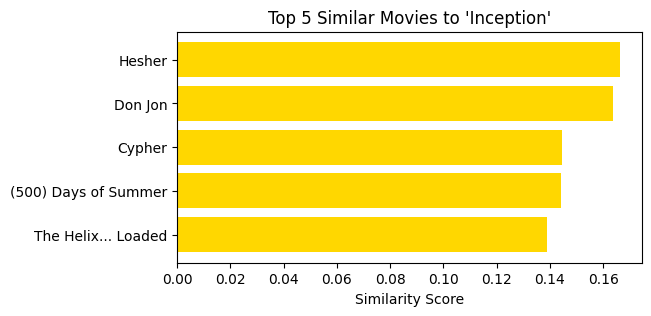

In [2]:
# Movie Recommendation System using PCA + KNN
# Step-by-step with Visualization

import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Data Loading and Cleaning
movies = pd.read_csv("/content/tmdb_5000_movies.csv")
credits = pd.read_csv("/content/tmdb_5000_credits.csv")

df = movies.merge(credits, on='title')
df = df[['title', 'genres', 'keywords', 'overview', 'cast', 'crew']]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Chart 1: Missing values before cleaning
plt.figure(figsize=(8,4))
df.isnull().sum().plot(kind='bar', color='skyblue')
plt.title("Missing Values Before Cleaning")
plt.show()


# Step 2: Feature Extraction
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return " ".join(L)

def get_cast(obj):
    L = []
    for i in ast.literal_eval(obj)[:3]:
        L.append(i['name'])
    return " ".join(L)

def get_director(obj):
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            return i['name']
    return ""

df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)
df['cast'] = df['cast'].apply(get_cast)
df['crew'] = df['crew'].apply(get_director)

df['tags'] = df['overview'] + " " + df['genres'] + " " + df['keywords'] + " " + df['cast'] + " " + df['crew']

# Chart 2: Word count distribution in tags
df['word_count'] = df['tags'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
plt.hist(df['word_count'], bins=50, color='coral')
plt.title("Distribution of Word Count in Combined Tags")
plt.xlabel("Word Count")
plt.ylabel("Number of Movies")
plt.show()


# Step 3: Convert Text to Numerical Vectors
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectors = vectorizer.fit_transform(df['tags']).toarray()

# Chart 3: Feature Importance (Top 20 Words)
feature_names = vectorizer.get_feature_names_out()
mean_vals = vectors.mean(axis=0)
sorted_idx = mean_vals.argsort()[-20:]
plt.figure(figsize=(10,5))
plt.barh(feature_names[sorted_idx], mean_vals[sorted_idx], color='mediumseagreen')
plt.title("Top 20 Most Frequent Words in Movies")
plt.show()


# Step 4: Dimensionality Reduction using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Chart 4: PCA 2D Scatter
plt.figure(figsize=(10,7))
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.5, color='slateblue')
plt.title('Movies after PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Step 5: Model Building using KNN (Cosine Similarity)
similarity = cosine_similarity(vectors)

def recommend(movie):
    if movie not in df['title'].values:
        print("Movie not found.")
        return
    idx = df[df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])[1:6]
    print(f"\nTop 5 movies similar to '{movie}':\n")
    sim_titles = []
    for i in distances:
        title = df.iloc[i[0]].title
        sim_titles.append(title)
        print("•", title)

    # Chart 5: Similarity scores bar chart
    sim_scores = [i[1] for i in distances]
    plt.figure(figsize=(6,3))
    plt.barh(sim_titles, sim_scores, color='gold')
    plt.xlabel('Similarity Score')
    plt.title(f"Top 5 Similar Movies to '{movie}'")
    plt.gca().invert_yaxis()
    plt.show()

# Step 6: Display Sample Results
recommend('Avatar')
recommend('The Dark Knight Rises')
recommend('Inception')

